In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [261]:
house = pd.read_csv(r"C:\Users\HP\Desktop\CSV files\df1.csv")
house

,sn,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150.0,67 965.56
1,2,house,Nuevo León,25.688436,-100.198807,186.0,63 223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82.0,84 298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150.0,94 308.80
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,94 835.67
...,...,...,...,...,...,...,...
695,696,house,Morelos,NaN,NaN,310.0,237 089.17
696,697,house,Yucatán,21.050653,-89.558841,334.0,137 017.34
697,698,house,Yucatán,21.343796,-89.262060,130.0,110 404.35
698,699,apartment,Nuevo León,NaN,NaN,155.0,184 446.42


In [262]:
house = house.dropna()
house.isnull().sum()
house['price_usd']

0       67 965.56
1       63 223.78
2       84 298.37
3       94 308.80
5      105 191.37
          ...    
693    115 910.26
694     77 572.89
696    137 017.34
697    110 404.35
699     56 637.97
Name: price_usd, Length: 583, dtype: object

In [263]:
house['price_usd'] = house['price_usd'].replace(" ", "", regex=True)
house.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_11128\78044408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_usd'] = house['price_usd'].replace(" ", "", regex=True)


,sn,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,2,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
5,6,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [264]:
house['price_usd'] = house['price_usd'].astype('float')
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sn             583 non-null    int64  
 1   property_type  583 non-null    object 
 2   state          583 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        583 non-null    float64
 6   price_usd      583 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.4+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_11128\262621266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_usd'] = house['price_usd'].astype('float')


<AxesSubplot:>

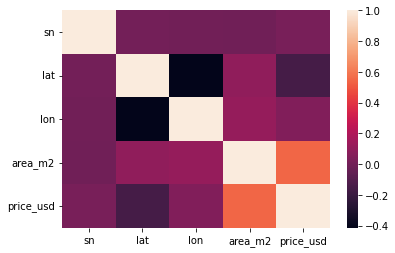

In [265]:
#data visualization
sns.heatmap(house.corr())

In [266]:
x = house.iloc[:,1:6].values
y = house.iloc[:,6].values
y

array([ 67965.56,  63223.78,  84298.37,  94308.8 , 105191.37, 274034.68,
       151509.56,  79029.72, 115937.75,  63223.78, 157269.15, 104607.47,
        63238.77,  77994.48, 131716.2 , 203167.1 , 264390.77,  63238.77,
        36775.16, 173570.3 , 131716.2 ,  67175.26, 262905.55,  40041.72,
        64556.24,  44783.51, 104846.1 , 158059.45,  84845.35,  39514.86,
       158059.45,  92223.21, 129639.48, 120125.18, 158059.45,  51632.75,
       155461.98, 126447.56,  51662.25,  97598.5 ,  57955.13, 108534.15,
       247626.47,  86300.46,  44794.13,  40841.7 ,  95309.84, 150719.07,
        81683.41,  65858.1 , 192087.77,  60603.82, 237089.17,  41095.45,
       158096.93, 227351.46,  67438.69, 136984.85,  93781.94, 205477.28,
        43887.84,  94835.67, 105372.96,  79029.72, 176499.72,  81630.71,
       105372.96, 126477.54,  34254.33,  72707.34,  35563.37, 207057.88,
        76395.4 , 126447.56, 216014.58,  52423.05, 118386.52,  63238.77,
       173865.39, 226551.88,  34254.33, 139652.29, 

In [267]:
sc = StandardScaler()
x[:, 2:] = sc.fit_transform(x[:, 2:])


In [268]:
labelencoder = LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:,0])
x[:, 1] = labelencoder.fit_transform(x[:,1])
x

array([[1, 7, -0.43618254519190164, -0.17498658540410936,
        -0.23740571467683755],
       [1, 14, 1.956803621571853, -0.37635146306491846,
        0.2207288145285199],
       [0, 9, -1.5266005152690179, -0.2857271495897709,
        -1.1027709365091793],
       ...,
       [1, 25, 0.14582316577315818, 1.8432299539445565,
        2.1041707679283226],
       [1, 25, 0.2602909053058444, 1.9051407566447687,
        -0.4919248975687028],
       [1, 16, -0.0350784116182665, -0.42215214829000586,
        -0.797347917038941]], dtype=object)

In [269]:
#train dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [270]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [271]:
y_pred = regressor.predict(x_test)

In [272]:
regressor.coef_

array([-54310.25990841,  -1795.57159974,  -7434.69438476,    405.385498  ,
        49997.62150278])

In [273]:
regressor.intercept_

180616.64779236508

In [274]:
r2_score(y_test, y_pred)

0.46369185580819505